In [3]:
from __future__ import print_function
import pandas as pd 
import numpy as np 
import math
import sys
import seaborn as sns
np.set_printoptions(threshold=sys.maxsize)
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats
from IPython.display import display, HTML
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score



In [4]:
column_names = ['experiment-id',
                    'time',
                    'frontal-acceleration',
                    'vertical-acceleration',
                    'lateral-acceleration',
                    'antenna-id',
                    'RSSI',
                    'phase',
                    'frequency',
                    'label']

dataset = pd.read_csv('/Users/José Diogo/Documents/GitHub/Trabalho-IART/Trabalho_2/test_file_S1.txt', header = None, names=column_names)
print(dataset)

df_test = dataset[dataset['experiment-id'] > 50]
df_train = dataset[dataset['experiment-id'] <= 50]

X_test = df_test.iloc[:, 0:9]
y_test = df_test.iloc[:, 9]
X_train = df_train.iloc[:, 0:9]
y_train = df_train.iloc[:, 9]


       experiment-id    time  frontal-acceleration  vertical-acceleration  \
0                  1    0.00              0.272030                1.00820   
1                  1    0.50              0.272030                1.00820   
2                  1    1.50              0.447910                0.91636   
3                  1    1.75              0.447910                0.91636   
4                  1    2.50              0.342380                0.96229   
5                  1    3.25              0.342380                0.96229   
6                  1    4.00              0.307210                0.99674   
7                  1    5.00              0.272030                0.99674   
8                  1    5.50              0.236850                1.03120   
9                  1    6.00              0.236850                1.03120   
10                 1    6.50              0.236850                1.03120   
11                 1    6.75              0.236850                1.03120   

In [5]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
#n_neighbors=sqrt(n), n=10, sqrt(10)=3.16, 3 is odd
classifier = KNeighborsClassifier(n_neighbors=3, p=2, metric='euclidean')

classifier.fit(X_train, y_train)

#KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean', metric_params=None, n_jobs=1, n_neighbors=7, p=2, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [7]:
y_pred = classifier.predict(X_test)
y_pred

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4,
       4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [8]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))
print(accuracy_score(y_test,y_pred))


[[3998   52  116  283]
 [  99  789    0    7]
 [  32    7 7327    0]
 [ 188   28    4  199]]
[0.92610609 0.90068493 0.98388613 0.40695297]
[0.89862891 0.88156425 0.9947054  0.47494033]
0.937847513138853


In [9]:
F1 = []

F1 = 2 * (precision_score(y_test, y_pred, average=None) * recall_score(y_test, y_pred, average=None)) / (precision_score(y_test, y_pred, average=None) + recall_score(y_test, y_pred, average=None))
print(F1)



[0.91216062 0.89102202 0.98926619 0.43832599]


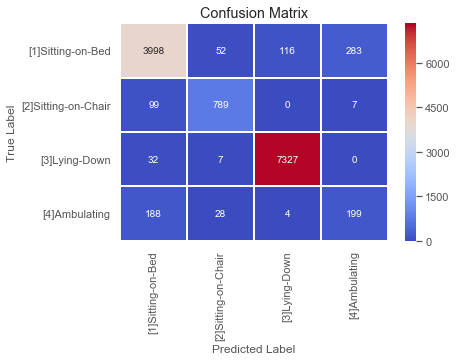

              precision    recall  f1-score   support

           1       0.93      0.90      0.91      4449
           2       0.90      0.88      0.89       895
           3       0.98      0.99      0.99      7366
           4       0.41      0.47      0.44       419

   micro avg       0.94      0.94      0.94     13129
   macro avg       0.80      0.81      0.81     13129
weighted avg       0.94      0.94      0.94     13129



In [11]:
# Set some standard parameters upfront
pd.options.display.float_format = '{:.1f}'.format
sns.set() # Default seaborn look and feel
plt.style.use('ggplot')
# Same labels will be reused throughout the program
LABELS = ['[1]Sitting-on-Bed',
          '[2]Sitting-on-Chair',
          '[3]Lying-Down',
          '[4]Ambulating']

def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Take the class with the highest probability from the test predictions
#max_y_pred_test = np.argmax(Y_pred, axis=1)
#max_y_test = np.argmax(Y_test, axis=1)

show_confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))